In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Load Processed Data

In [2]:
df = pd.read_csv("../data/processed/heart_cleaned.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_squared,chol_age_ratio,bp_age_ratio,cardiac_stress_score,vessel_severity,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,2704,4.076923,2.403846,1.005917,6,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,2809,3.830189,2.641509,4.106410,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,4900,2.485714,2.071429,3.607937,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,3721,3.327869,2.426230,0.006173,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,3844,4.741935,2.225806,1.909346,6,0


# Split Features & Target

In [3]:
X = df.drop("target", axis=1)
y = df["target"]


# Train / Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Train Final Random Forest Model

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Explainability Starts Here

* Feature Importance

In [6]:
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
2,cp,0.167155
16,cardiac_stress_score,0.149530
17,vessel_severity,0.096624
12,thal,0.095940
11,ca,0.086148
7,thalach,0.064012
9,oldpeak,0.051547
8,exang,0.050892
0,age,0.039241
13,age_squared,0.035108


# Feature Importance Visualization

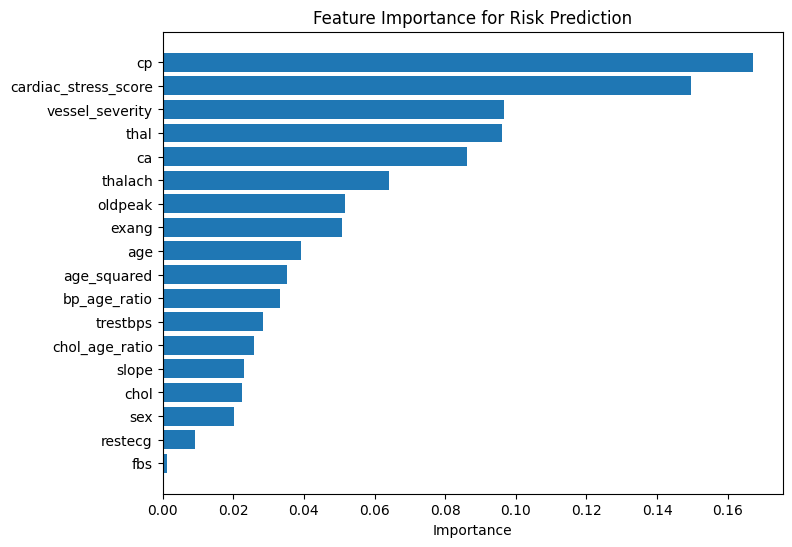

In [7]:
plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importance for Risk Prediction")
plt.gca().invert_yaxis()
plt.show()


# Save Feature Importance Figure

In [8]:
plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importance for Risk Prediction")
plt.gca().invert_yaxis()
plt.savefig("../results/figures/feature_importance.png")
plt.close()


# Explain a Single High-Risk Patient

In [9]:
high_risk_index = np.argmax(
    rf_model.predict_proba(X_test)[:, 1]
)

high_risk_patient = X_test.iloc[high_risk_index]
high_risk_patient


age                       52.000000
sex                        0.000000
cp                         2.000000
trestbps                 136.000000
chol                     196.000000
fbs                        0.000000
restecg                    0.000000
thalach                  169.000000
exang                      0.000000
oldpeak                    0.100000
slope                      1.000000
ca                         0.000000
thal                       2.000000
age_squared             2704.000000
chol_age_ratio             3.769231
bp_age_ratio               2.615385
cardiac_stress_score       0.105882
vessel_severity            0.000000
Name: 941, dtype: float64

* Interpret Explanation

In [13]:
explanation = importance_df.head(5)

explanation


,Feature,Importance
2,cp,0.167155
16,cardiac_stress_score,0.149530
17,vessel_severity,0.096624
12,thal,0.095940
11,ca,0.086148


## Feature Importance Interpretation

The model identified clinically meaningful features as the main drivers of risk prediction:

- Chest pain type (cp) emerged as the most influential feature.
- The engineered cardiac stress score significantly contributed to risk estimation.
- Vessel severity, combining the number of affected vessels and blood flow condition, showed strong importance.
- Thalassemia-related indicators (thal) and the number of major vessels (ca) further reinforced the prediction.

These results confirm that the model relies on medically relevant risk patterns rather than random correlations.
